<a href="https://colab.research.google.com/github/lilynaza/-recommender_system/blob/main/Lilynaza_DSN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 >This project is aimed at buildng a robust intelligent model capable of recommending products and services to Users based on their activities on sapa.com

### Variable definitions

1. ID: Unique identifier for each User
2. Year_of_Birth: Year of birth
3. Education_Level: The highest level of education attained by the User
4. Marital_Status: Marital status
5. Disposable_Income: Yearly User’s household disposable income
6. No_of_Kids_in_home: total count of children in the user’s home
7. No_of_Teen_in_home: Number of teenagers in the User's household
8. Date_User: Date of User's enrollment with the company
9. Recency: Number of days since User's last purchase
10. Discounted_Purchases: Counts of purchases made by the user using coupons
11. WebPurchases: Counts of purchases made by the user through the company’s website
12. CatalogPurchases: Counts of purchases made by the user using a catalogue
13. StorePurchases: Counts of purchases made by the user directly in stores
14. Amount_on_Wines: Total amount user spent on wine and drinks within the last 3 years
15. Amount_on_Fruits: Total amount user spent on fruity food within the last 3 years
16. Amount_on_MeatProducts: Total amount user spent on meat products and livestock within the last 3 years
17. Amount_on_FishProducts: Total amount user spent on fish alone within the last 3 years
18. Amount_on_SweetProducts: Total amount user spent on sweets and chocolates within the last 3 years
19. Amount_on_GoldProds: Total amount user spent on golden products within the last 3 years
20. WebVisitsMonth: The number of times the user of visits to company’s website within the last 4 weeks
21. Cmp3Accepted: 1: Offer was accepted after the third campaign, 0 otherwise
22. Cmp4Accepted: 1: Offer was accepted after the fourth campaign, 0 otherwise
23. Cmp5Accepted: 1: Offer was accepted after the fifth campaign, 0 otherwise
24. Cmp1Accepted: 1: Offer was accepted after the first campaign, 0 otherwise
25. Cmp2Accepted: 1: Offer was accepted after the second campaign, 0 otherwise
26. Any_Complain: 1 if the user has a compliant history with the platform in the last 3 years, 0 otherwise
27. User_Response: 1: indicates the acceptance of offer and 0 otherwise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ai-bootcamp/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/ai-bootcamp/Test.csv')

In [ ]:
ID = test['ID']
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [ ]:
sub_file = pd.DataFrame(columns=['ID', 'Response'])
sub_file.head()

,ID,Response


In [ ]:
sub_file.ID = test.ID
sub_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


## EDA






In [ ]:
print(f'The Size of the train set is: {train.shape}, and the size of test shape is : {test.shape}')

The Size of the train set is: (1568, 27), and the size of test shape is : (672, 26)


In [ ]:
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [ ]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Birth,1568.0,1970.073342,11.920781,1900.0,1960.0,1971.0,1979.00,1997.0
Disposable_Income,1552.0,62381.186598,32089.169563,2076.0,41612.4,60964.2,81493.20,799999.2
No_of_Kids_in_home,1568.0,0.460459,0.540361,0.0,0.0,0.0,1.00,2.0
No_of_Teen_in_home,1568.0,0.497449,0.544151,0.0,0.0,0.0,1.00,2.0
Recency,1568.0,55.408801,28.788037,7.0,31.0,56.0,80.00,106.0
Discounted_Purchases,1568.0,2.292730,1.937544,0.0,1.0,2.0,3.00,15.0
WebPurchases,1568.0,4.001276,2.773748,0.0,2.0,3.0,6.00,27.0
CatalogPurchases,1568.0,2.665816,3.043493,0.0,0.0,2.0,4.00,28.0
StorePurchases,1568.0,5.703444,3.260553,0.0,3.0,5.0,8.00,13.0
Amount_on_Wines,1568.0,303.190051,340.141396,5.0,27.0,167.0,499.50,1498.0


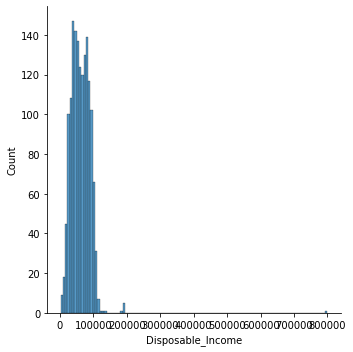

In [ ]:
#filling the only missing value in train['Disposable_Income']; a displot will tell us how best to fill it

sns.displot(train['Disposable_Income'])

In [ ]:
#Fill missing values with median quartile from describe above

train['Disposable_Income'].fillna((train['Disposable_Income'].median()) , inplace = True)
test['Disposable_Income'].fillna((test['Disposable_Income'].median()) , inplace = True)
#check again to make sure
train.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

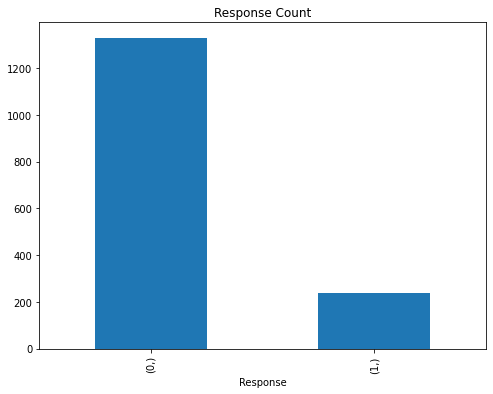

In [ ]:
train[['Response']].value_counts().plot(kind='bar', figsize=(8, 6), title="Response Count")

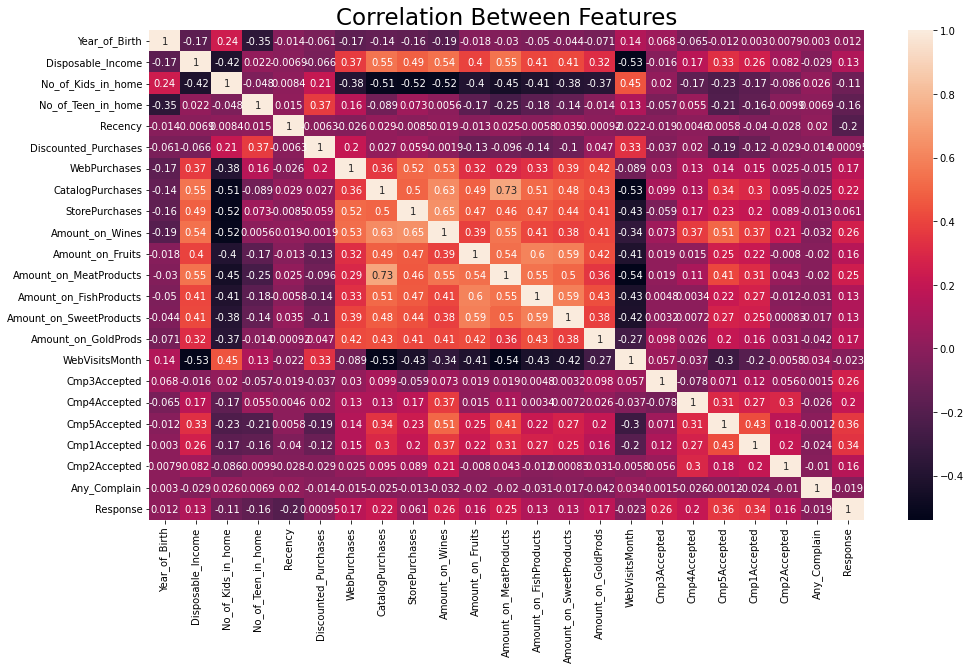

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation Between Features", fontsize=23)
plt.show()

## Feature Engineering and Encoding

In [ ]:
#Year of birth

dataframe = [train, test]

for data in dataframe:
  col = 'Year_of_Birth'
  conditions = [data[col] < 1950, (data[col] >= 1950) & (data[col] <= 1960), (data[col] > 1960) & (data[col] <=1970), (data[col] > 1970) & (data[col] <=1980), (data[col] > 1980) & (data[col] <=1990), data[col] > 1990]
  choices = [1, 2, 3, 4, 5, 6]
  data["Age_group"] = np.select(conditions, choices, default=np.nan).astype(int)

for data in dataframe:
  data = data.drop(['Year_of_Birth'],axis=1)

In [ ]:
train['Age_group'].value_counts()

4    526
3    344
2    333
5    255
1     60
6     50
Name: Age_group, dtype: int64

In [ ]:
print(train['Education_Level'].value_counts())
print("-----------------------------")

print(train['Marital_Status'].value_counts())

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64
-----------------------------
Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64


In [ ]:
dataframe = [train, test] 


for data in dataframe:
  data['Marital_Status'] = data['Marital_Status'].replace({'Absurd':'Together', 'YOLO':'Married', 'Alone':'Single'})  


In [ ]:
#for Education level
def transform_edu(Education):
  if Education == 'PhD':
    return 1
  elif Education == 'Master':
    return 2
  elif Education == 'Graduation':
    return 3
  else:
    return 4      

test['Education'] = test['Education_Level'].apply(transform_edu)
train['Education'] = train['Education_Level'].apply(transform_edu)

test['Education'].value_counts()

3    325
2    185
1    146
4     16
Name: Education, dtype: int64

In [ ]:
#For Marital_Status
def transform_martial(status):
  if status == 'Married':
    return 1
  elif status == 'Together':
    return 2
  elif status == 'Single':
    return 3
  elif status == 'Divorced':
    return 4
  else:
    return 5        


test['Marital_S'] = test['Marital_Status'].apply(transform_martial)
train['Marital_S'] = train['Marital_Status'].apply(transform_martial)

train['Marital_S'].value_counts()

1    617
2    410
3    332
4    159
5     50
Name: Marital_S, dtype: int64

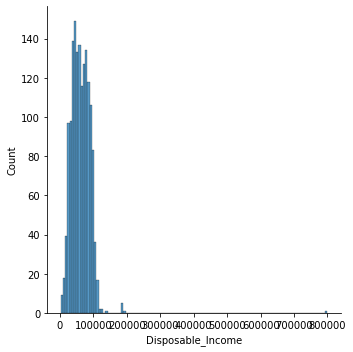

In [ ]:
#For Disposable_Income

sns.displot(train['Disposable_Income'])

In [ ]:
#For Disposable_Income

def convert_amount(amount):
  if amount <= 41612.4:
    return 1
  elif amount <= 60964.2:
    return 2
  elif amount <= 81493.20:
    return 3 
  elif amount <= 100000:
    return 4
  else:
    return 5  


  
train['disposable_amt_cat'] = train['Disposable_Income'].apply(convert_amount)
test['disposable_amt_cat'] = test['Disposable_Income'].apply(convert_amount)
  

train['disposable_amt_cat'].value_counts()

2    404
3    389
1    388
4    299
5     88
Name: disposable_amt_cat, dtype: int64

In [ ]:
train['No_of_Kids_in_home'].value_counts()

0    880
1    654
2     34
Name: No_of_Kids_in_home, dtype: int64

In [ ]:
#for Date Customer

dataframe = [train, test]

for data in dataframe:
  data['Date_hist'] = data['Date_Customer'].str.split("-", expand=True)[2].astype(int)


In [ ]:
#For Date_hist
def convert_date(Date):
  if Date <=2012:
    return 1
  elif Date <= 2013:
    return 2
  else:
    return 3

test['New_Date']  = test['Date_hist'].apply(convert_date) 
train['New_Date']  = train['Date_hist'].apply(convert_date)      

test['New_Date'].value_counts()

2    357
3    174
1    141
Name: New_Date, dtype: int64

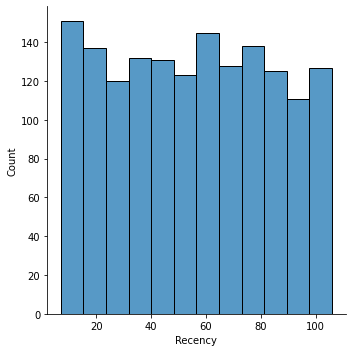

In [ ]:
sns.displot(train['Recency'])

In [ ]:
def convert_recency(recency):
  if recency <= 20:
    return 1
  elif recency <= 40:
    return 2
  elif recency <= 60:
    return 3
  elif recency <= 80:
    return 4
  else:
      return 5     

dataframe = [train, test]

for data in dataframe:
  data['new_Recency'] = data['Recency'].apply(convert_recency)
  data = data.drop(['Recency'],axis=1)

train['new_Recency'].value_counts()

5    384
4    327
2    306
3    304
1    247
Name: new_Recency, dtype: int64

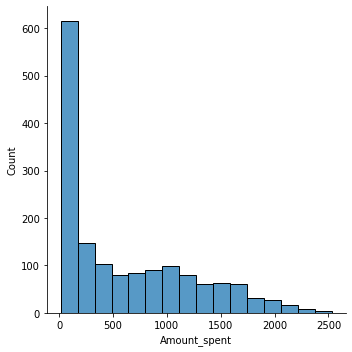

In [ ]:
#Amount spent by user

dataframe = [train, test]

for data in dataframe:
  data['Amount_spent'] = data['Amount_on_FishProducts'] + data['Amount_on_Fruits'] + data['Amount_on_GoldProds'] + data['Amount_on_MeatProducts'] + data['Amount_on_SweetProducts'] + data['Amount_on_Wines']

sns.displot(train['Amount_spent'])

In [ ]:
train[train.columns[0:]].corr()['Response'][:].sort_values(ascending=False)

Response                   1.000000
Cmp5Accepted               0.357647
Cmp1Accepted               0.344083
Amount_spent               0.284348
Amount_on_Wines            0.259173
Cmp3Accepted               0.257106
Amount_on_MeatProducts     0.247182
CatalogPurchases           0.221534
Cmp4Accepted               0.202437
disposable_amt_cat         0.187138
Amount_on_GoldProds        0.174229
WebPurchases               0.165538
Cmp2Accepted               0.157353
Amount_on_Fruits           0.155225
Amount_on_SweetProducts    0.133005
Disposable_Income          0.130022
Amount_on_FishProducts     0.129884
Marital_S                  0.111335
StorePurchases             0.061446
Age_group                  0.024233
Year_of_Birth              0.012279
Discounted_Purchases       0.000951
Any_Complain              -0.019206
WebVisitsMonth            -0.023043
Education                 -0.075948
No_of_Kids_in_home        -0.108558
No_of_Teen_in_home        -0.156209
Date_hist                 -0

In [ ]:
train = train.drop(['ID', 'Education_Level', 'Year_of_Birth', 'Marital_Status', 'Date_Customer', 'Date_hist','Discounted_Purchases', 'Recency'], axis=1)
test = test.drop(['ID', 'Education_Level', 'Year_of_Birth', 'Marital_Status', 'Date_Customer', 'Date_hist','Discounted_Purchases', 'Recency'], axis=1)

In [ ]:
train_majority = train[train.Response==0]
train_minority = train[train.Response==1]

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
# Upsample minority class
df_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1329,    # to match majority class
                                 random_state=123)

In [ ]:
train_upsampled = pd.concat([train_majority, df_minority_upsampled])
train_upsampled['Response'].value_counts()

1    1329
0    1329
Name: Response, dtype: int64

In [ ]:
train_upsampled = train

In [ ]:
train.head()

,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Age_group,Education,Marital_S,disposable_amt_cat,New_Date,new_Recency,Amount_spent
0,77504.4,1,1,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2,3,4,3,3,3,116
1,56784.0,0,1,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2,3,2,2,2,1,422
2,103714.8,0,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,3,3,3,5,2,1,1457
3,46311.6,1,0,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,4,2,3,2,2,3,185
4,87486.0,0,0,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2,3,1,4,3,3,1523


In [ ]:
test.head()

,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Age_group,Education,Marital_S,disposable_amt_cat,New_Date,new_Recency,Amount_spent
0,48556.8,0,1,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0,2,3,3,2,2,5,638
1,57499.2,0,1,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0,3,3,5,2,1,4,614
2,17025.6,0,0,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0,4,4,1,1,2,3,83
3,91983.6,0,0,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0,3,3,2,4,2,5,2287
4,78235.2,0,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0,2,3,2,3,2,3,1163


In [ ]:
test.isnull().sum()

Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Age_group                  0
Education                  0
Marital_S                  0
disposable_amt_cat         0
New_Date                   0
new_Recency                0
Amount_spent               0
dtype: int64

In [ ]:
train.shape, test.shape

((1568, 27), (672, 26))

# Modelling

In [ ]:
y = train['Response']
X = train.drop(['Response'], axis=1)

X_test = test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

pred = clf_rf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy is: ',accuracy)

Accuracy is:  0.8949044585987261


In [ ]:
pred_X = clf_rf.predict(X_test)

In [ ]:
Submission = pd.DataFrame({'ID': ID,
                            'Prediction': pred_X})

Submission.to_csv("baseline_10", index=False)
Submission.head()

,ID,Prediction
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0


In [ ]:
Submission['Prediction'].value_counts()

0    628
1     44
Name: Prediction, dtype: int64

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)

## Model 2

In [ ]:
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score
from xgboost import XGBClassifier
reg=XGBClassifier()

In [ ]:
params={"n_estimators":[67,70,100,120],'reg_lambda':[2,1],'gamma':[0,0.3,0.2,0.1]
       ,'eta':[0.06,0.05,0.04]
        ,"max_depth":[3,5],'objective':['binary:logistic']}

clf=GridSearchCV(reg,params,cv=10,n_jobs=-1,verbose=1)
clf.fit(x_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  3.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.06, 0.05, 0.04], 'gamma': [0, 0.3, 0.2, 0.1],
                         'max_depth': [3, 5],
                         'n_estimators': [67, 70, 1

In [ ]:
ypred=clf.predict(x_train)
pred_X=clf.predict(X_test)
print(accuracy_score(ypred,y_train))
clf.best_params_

0.9258373205741627


{'eta': 0.06,
 'gamma': 0.3,
 'max_depth': 3,
 'n_estimators': 67,
 'objective': 'binary:logistic',
 'reg_lambda': 2}

In [ ]:
Submission = pd.DataFrame({'ID': ID,
                            'Prediction': pred_X})

Submission.to_csv("baseline_12.csv", index=False)
Submission.head()

,ID,Prediction
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [ ]:
Submission['Prediction'].value_counts()

0    637
1     35
Name: Prediction, dtype: int64

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['cart'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  return models

In [ ]:
def evaluate_model(model, X_train, y_train):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, x_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

In [ ]:
# get the models to evaluate
from numpy import mean
from numpy import std
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.844 (0.015)
>knn 0.825 (0.019)
>cart 0.833 (0.029)
>svm 0.843 (0.003)
>bayes 0.747 (0.037)


In [ ]:
def get_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy is: ',accuracy)

Accuracy is:  0.8949044585987261


In [ ]:
pred_X = model.predict(X_test)

In [ ]:
Submission = pd.DataFrame({'ID': ID,
                            'Prediction': pred_X})

Submission.to_csv("baseline_13.csv", index=False)
Submission.head()

,ID,Prediction
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,1


## Hyperparameter Tuning

In [ ]:
pip install optuna
import optuna

In [ ]:
X = train_df[features]
y = train_df[target]

In [ ]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1, 10)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'



    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = CatBoostClassifier(**param)
#         model = XGBClassifier(**param)
    

        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#erly100
        preds=model.predict(X_test)

        oof_f1.append(f1_score(y_test,preds))

    return np.mean(oof_f1)

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
    param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
#     param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
#     param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
    param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 3, 10)




    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LGBMClassifier(**param ,n_estimators=10000)

    
        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
        preds=model.predict(X_test)
        oof_f1.append(f1_score(y_test,preds))

    

    return np.mean(oof_f1)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
trial.params

In [ ]:
oof_f1=[]
lgb_oof_predictions=[]


param = trial.params



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
    model = LGBMClassifier(**param ,n_estimators=10000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict_proba(test_df[X_.columns])[:, -1]
    lgb_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

In [ ]:
pred_lgb = pd.DataFrame(lgb_oof_predictions).T

In [ ]:
pred_cat = pd.DataFrame(cat_oof_predictions).T